# IRREDUCIBLE MASS OF BLACK HOLES
We want to study the distribution of the irreducible mass of black holes. First of all, we generate data of $M_{\mathrm{irr}}$ assuming that $M$ is distributed following a gaussian distribution with mean 1 (in some units) and $\sigma = 0.2$, whereas for the spin $\chi$ we assume that it is distributed uniformly between 0 and 1. We plot the data using histograms, choosing the bins first in order to have the same counts for every bin and then following the Freedman-Diaconis rule, and using kernel densities, choosing different kernels.

In [1]:
import numpy as np
import scipy.stats as sst
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from astropy.visualization.hist import hist as fancyhist
from astroML import stats as ast

In [2]:
sigma = 0.02
dim_sample = 10000
distrChi = sst.uniform(0, 1)
distrM = sst.norm(1, sigma)

def f(Chi):
    return np.sqrt((1+np.sqrt(1 - Chi**2.0))/2.0)
def M_irr(M, Chi):
    return M * f(Chi)

data = np.array([])
data = np.append(data, M_irr(distrM.rvs(dim_sample), distrChi.rvs(dim_sample)))

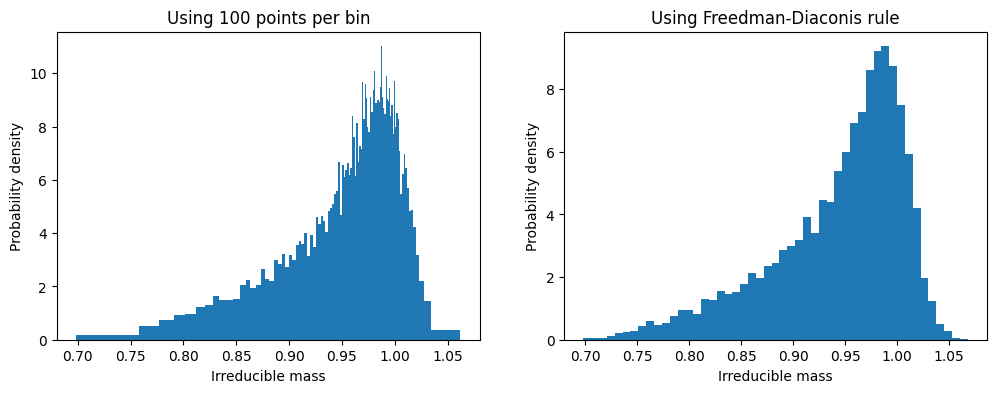

In [3]:
data_per_bin = 100
bins_fixed_num = np.append(np.sort(data)[::data_per_bin], np.max(data))
plt.figure(figsize=[12.0, 4])
plt.subplot(1, 2, 1)
_ = plt.hist(data, bins=bins_fixed_num, density = True)
_ = plt.title("Using {} points per bin".format(data_per_bin))
_ = plt.xlabel("Irreducible mass")
_ = plt.ylabel("Probability density")
plt.subplot(1, 2, 2)
_ = fancyhist(data, bins="freedman", density = True)
_ = plt.title("Using Freedman-Diaconis rule")
_ = plt.xlabel("Irreducible mass")
_ = plt.ylabel("Probability density")

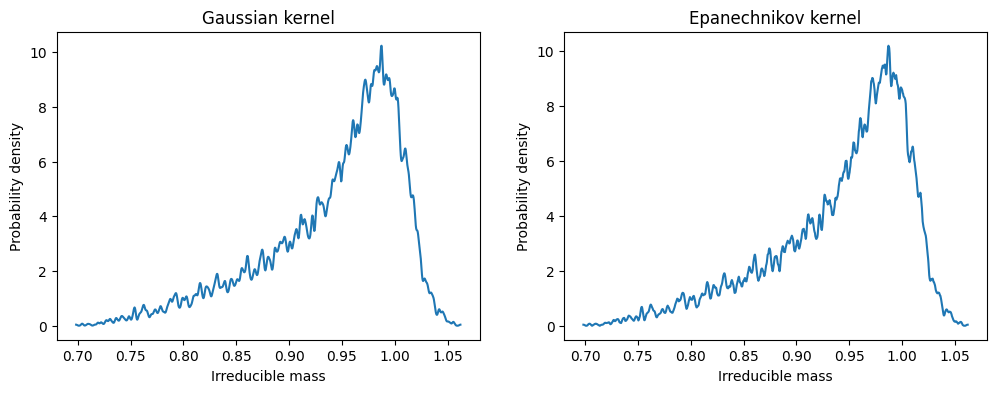

In [4]:
kde_gauss = KernelDensity(bandwidth = 0.001, kernel="gaussian")
kde_gauss.fit(data[:, np.newaxis])
x = np.linspace(np.min(data), np.max(data), 1000)
pdf_gauss = np.exp(kde_gauss.score_samples(x[:,np.newaxis]))
plt.figure(figsize=[12.0, 4])
plt.subplot(1, 2, 1)
plt.plot(x, pdf_gauss)
_ = plt.xlabel("Irreducible mass")
_ = plt.ylabel("Probability density")
plt.title("Gaussian kernel")
kde_epa = KernelDensity(bandwidth = 0.002, kernel="epanechnikov")
kde_epa.fit(data[:, np.newaxis])
pdf_epa = np.exp(kde_epa.score_samples(x[:,np.newaxis]))
plt.subplot(1, 2, 2)
plt.plot(x, pdf_epa)
_ = plt.title("Epanechnikov kernel")
_ = plt.xlabel("Irreducible mass")
_ = plt.ylabel("Probability density")

Now we want to study the distribution of the irreducible mass when $\sigma$ varies from $\sigma \ll \mu$ to $\sigma \gg \mu$. Precisely, we compare the distribution to the distribution of $M_{\mathrm{irr}}/M = f(\chi)$ and to the distribution of $M$. To do this, we use the Kolmogorov-Smirnov test.

[]

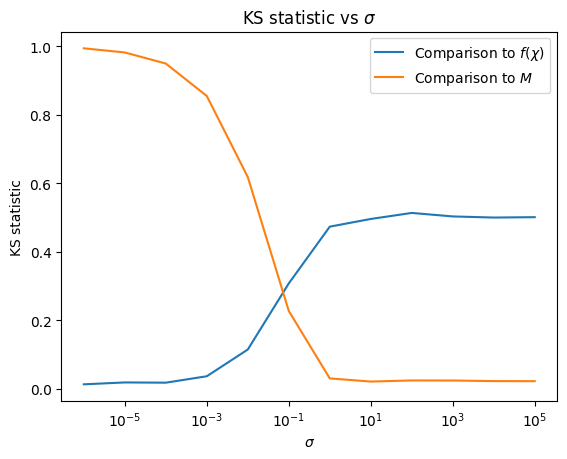

In [5]:
x_sigma = np.array([10 ** (i) for i in range(-6, 6)])
ks_f = np.array([])
ks_M = np.array([])

for i in range(len(x_sigma)):
    distr = sst.norm(1, x_sigma[i])
    new_data = np.array([])
    new_data = np.append(new_data, M_irr(distr.rvs(dim_sample), distrChi.rvs(dim_sample)))
    ks_f = np.append(ks_f, (sst.ks_2samp(new_data, f(distrChi.rvs(dim_sample)))).statistic)
    ks_M = np.append(ks_M, (sst.ks_2samp(new_data, distr.rvs(dim_sample))).statistic)

plt.plot(x_sigma, ks_f, label = r"Comparison to $f(\chi)$")
plt.plot(x_sigma, ks_M, label = r"Comparison to $M$")
plt.legend()
plt.title(r"KS statistic vs $\sigma$")
_ = plt.xlabel(r"$\sigma$")
_ = plt.ylabel("KS statistic")
plt.semilogx()

As we can see, the distribution of $M_{\mathrm{irr}}$ is similar to $f$ when the variance is small. This is because the variance is so small that the mass is almost always 1, so $M_{\mathrm{irr}} = M f(\chi)$ is basically distributed following $f$. For big values of $\sigma$ the values of the mass vary so largely that dominate the distribution, so $M_{\mathrm{irr}}$ is distributed following $M$.

We now compute the true pdf of $M_{\mathrm{irr}}$. Firstly, we compute the probability distribtution of $f$, changing variable:
$$pdf_{f} (f)= \biggl|\frac{d \chi}{df}\biggr|pdf_{\chi}(\chi).$$
We have that $\chi = 2f\sqrt{1-f^2}$, so:
$$pdf_{f} (f)= 2\frac{2f^2-1}{\sqrt{1-f^2}}$$
Then, the distribution of a variable which is the product of other two (in fact we have $M_{\mathrm{irr}} = Mf$) is:
$$pdf(M_{\mathrm{irr}}) = \int df \,\,pdf_f(f)\,\,pdf_M(M_{\mathrm{irr}}/f)/|f| = \int_{1/\sqrt{2}}^1 df \,\,2\frac{2f^2-1}{\sqrt{1-f^2}}\,\, \frac{\exp(-(M_{\mathrm{irr}}/f - 1)^2/2\sigma^2)}{\sqrt{2\pi}\sigma f}.$$

We can plot it over thr data to see the correspondence:

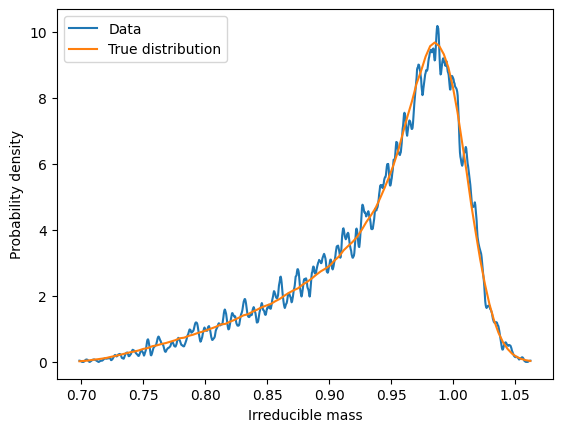

In [6]:
M_irr = np.linspace(np.min(data), np.max(data), 100)
pdf_M_irr = np.array([])
for i in range(len(M_irr)):
    sample_f = np.array([])
    sample_f = np.append(sample_f, f(distrChi.rvs(100000)))
    pdf_M_irr = np.append(pdf_M_irr, np.mean(distrM.pdf(M_irr[i]/sample_f)/sample_f))

plt.plot(x, pdf_epa, label = "Data")
plt.plot(M_irr, pdf_M_irr, label = "True distribution")
_ = plt.xlabel("Irreducible mass")
_ = plt.ylabel("Probability density")
plt.legend()